# ML Project by Aun Muhammad Ashraf and Anas Semsayan (15-288)

# D3 Part 1

### Table of Contents


- [Iteration 1: KNN Classifier with GridSearchCV and Evaluation](#iteration-1-knn-classifier-with-gridsearchcv-and-evaluation)  
- [Iteration 2: Decision Trees](#iteration-2-decision-trees)  
    - [Training bagging](#training-bagging)  
    - [Training random forest](#training-random-forest)  
- [Iteration 3: Support Vector Machines (SVMs)](#iteration-3-support-vector-machines-svms)  
  - [Linear SVM](#linear-svm)  
  - [RBF SVM](#rbf-svm)  
  - [SVM Poly](#svm-poly)  


# Iteration 1: KNN Classifier with GridSearchCV and Evaluation

In [5]:
import pandas as pd
import numpy as np
import random


df = pd.read_csv('cleaned_course_difficulty_dataset.csv')
df.describe()

course_rating  assignments_per_week  attendance_required  \
count   49493.000000          49493.000000         49493.000000   
mean        0.030123              0.164131            -0.493888   
std         0.622621              0.567016             0.499968   
min        -0.764706             -0.666667            -1.000000   
25%        -0.529412             -0.333333            -1.000000   
50%         0.000000              0.000000             0.000000   
75%         0.470588              0.666667             0.000000   
max         1.588235              1.000000             0.000000   

       sentiment_score         units  hours_per_week      projects  \
count     49493.000000  49493.000000    49493.000000  49493.000000   
mean          0.060433     -0.225355       -0.100253     -0.499323   
std           0.600300      0.534639        0.669280      0.500005   
min          -0.693069     -1.000000       -1.800000     -1.000000   
25%          -0.495050     -1.000000       -0.600000     -1.000000   
50%           0.000000      0.000000        0.000000      0.000000   
75%           0.504950      0.000000        0.400000      0.000000   
max           1.287129      0.500000        6.600000      0.000000   

       midterms_count    final_exam  grading_strictness  failure_rate  \
count    49493.000000  49493.000000        49493.000000  49493.000000   
mean         0.000707     -0.499646            0.002666     -0.043818   
std          0.407203      0.500005            0.584731      0.701755   
min         -0.500000     -1.000000           -1.000000     -2.000000   
25%         -0.500000     -1.000000           -0.500000     -0.538462   
50%          0.000000      0.000000            0.000000      0.000000   
75%          0.500000      0.000000            0.500000      0.461538   
max          0.500000      0.000000            5.850000      1.076923   

       difficulty_level_num  effort_score  
count          49493.000000  4.949300e+04  
mean               0.899885 -1.543316e-17  
std                0.700229  1.000010e+00  
min                0.000000 -2.059751e+00  
25%                0.000000 -7.139226e-01  
50%                1.000000  1.570195e-02  
75%                1.000000  7.221638e-01  
max                2.000000  2.057034e+00

In [7]:

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# Prepare data (assuming df_fe is already scaled and clean)
X = df.drop(columns=['difficulty_level_num'])
y = df['difficulty_level_num']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Apply PCA
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)

explained_variance = np.sum(pca.explained_variance_ratio_)
print(explained_variance)
# Then split PCA-reduced data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

0.9939207996713166


In [141]:
import joblib
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [9]:
X_2d = df[['course_rating', 'assignments_per_week']].values
y_2d = y_encoded  # or df['difficulty_level_num'] if you haven't encoded yet

In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 13, 15, 20, 30, 50],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}

# Grid search with cross-validation
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean'],
                         'n_neighbors': [3, 5, 7, 9, 13, 15, 20, 30, 50],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Grid Search Results:


param_n_neighbors param_weights  mean_test_score  std_test_score
0                   3       uniform         0.851543        0.006617
1                   3      distance         0.852023        0.006794
2                   5       uniform         0.862808        0.006137
3                   5      distance         0.863363        0.005753
4                   7       uniform         0.868288        0.003595
5                   7      distance         0.869071        0.002976
6                   9       uniform         0.872607        0.004060
7                   9      distance         0.873137        0.003828
8                  13       uniform         0.876547        0.002827
9                  13      distance         0.877204        0.002848
10                 15       uniform         0.877229        0.002412
11                 15      distance         0.878315        0.003415
12                 20       uniform         0.879401        0.001869
13                 20      distance         0.880941        0.002668
14                 30       uniform         0.880260        0.002820
15                 30      distance         0.882507        0.002165
16                 50       uniform         0.879073        0.002243
17                 50      distance         0.882280        0.002011

Best KNN configuration: {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      2972
           1       0.86      0.93      0.89      4946
           2       0.92      0.84      0.88      1981

    accuracy                           0.89      9899
   macro avg       0.90      0.87      0.88      9899
weighted avg       0.89      0.89      0.89      9899



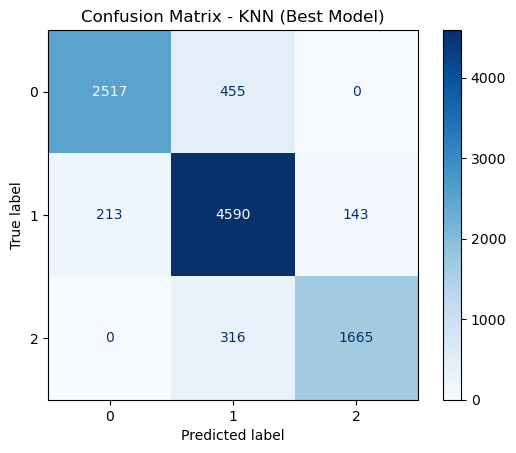

Cross-validated Accuracy: 0.8853 ± 0.0027


In [12]:
results_df = pd.DataFrame(grid_search.cv_results_)
print("Grid Search Results:")
display(results_df[['param_n_neighbors', 'param_weights', 'mean_test_score', 'std_test_score']])


# Best model
best_knn = grid_search.best_estimator_
print("Best KNN configuration:", grid_search.best_params_)

# Evaluate on test set
y_pred = best_knn.predict(X_test)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN (Best Model)")
plt.show()

# Cross-validation accuracy
cv_score = cross_val_score(best_knn, X, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")

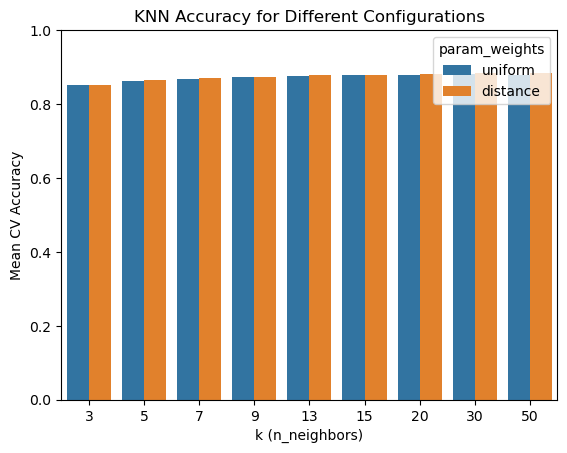

In [14]:
import seaborn as sns
import pandas as pd

# Pull grid search results
results = pd.DataFrame(grid_search.cv_results_)
sns.barplot(data=results, x='param_n_neighbors', y='mean_test_score', hue='param_weights')
plt.title("KNN Accuracy for Different Configurations")
plt.ylabel("Mean CV Accuracy")
plt.xlabel("k (n_neighbors)")
plt.ylim(0, 1)
plt.show()


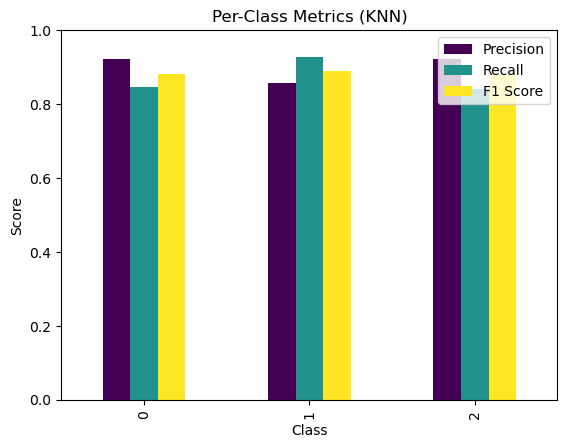

In [15]:
from sklearn.metrics import precision_recall_fscore_support

labels = le.classes_
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

metrics_df = pd.DataFrame({
    'Class': labels,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})
metrics_df.set_index('Class').plot(kind='bar', ylim=(0,1), title="Per-Class Metrics (KNN)", colormap="viridis")
plt.ylabel("Score")
plt.show()


In [16]:
#Create a custom color map
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'blue'])
cmap_clear = ListedColormap(['orange', 'lightgray', 'lime'])
cmap_two_clear = ListedColormap(['orange', 'lime'])

# to plot a colorbar, kinda convoluted here!
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_decision_regions(X, Y, estimator, x1=0, x2=1, title='',
                          my_cmap=cmap_clear, size=(14,8), data=True, clf=True):
    '''
    X: Array of (all) feature data 
    Y: Array of labels
    estimator: classifier (e.g., DT) or regressor trained on the feature pair (x1, x2)
    x1, x2: integers, index of the two features selected for plotting the decision region
    title: title of the plot (e.g., it might include the accuracy of the classifier)
    my_cmap: the colormap used to display label colors
    size: size of the figure, in matplotlib
    data: if True, the traiuning datapoints are shown together with the decision regions
    clf: if True, estimator is a classifier, a regressor otherwise
    '''
    
    # get feature ranges for creating a meshgrid
    feature_ranges = np.array([ (np.floor(np.min(X[:, i])), 
                                 np.ceil(np.max(X[:, i]))) 
                                 for i in [x1, x2]]  )

    num_of_pts = 1000
    
    # a meshgrid of values for (f1, f2), these are the points where 
    # algorithm will be queried and that we want to visualize
    xx, yy = np.meshgrid( np.linspace(feature_ranges[0, 0],
                                      feature_ranges[0, 1], 
                                      num=num_of_pts),
                          np.linspace(feature_ranges[1, 0],
                                      feature_ranges[1, 1], 
                                      num=num_of_pts))
    #print(xx.shape, yy.shape)

    # get the labels of all the points in the meshgrid
    labels_mesh = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # reshape the array to be of the same dimesion as xx and yy
    labels_mesh = labels_mesh.reshape(xx.shape)

    #print(np.c_[xx.ravel(), yy.ravel()].shape, labels_mesh.shape)

    plt.figure(figsize=size)
    plt.title(title)

    labels = np.unique(Y.values if hasattr(Y, "values") else Y)
    n_classes = len(labels)
    norm = BoundaryNorm(boundaries=np.arange(n_classes + 1) - 0.5, ncolors=n_classes)

    # the color map automatically assigns a different color to the 
    # different values of labels / cluster 
    plt.pcolormesh(xx, yy, labels_mesh, cmap=my_cmap, norm=norm)

    # Add the original data points 
    if data == True:
        scatter = plt.scatter(X[:, x1], X[:, x2], c=Y, s=50, edgecolor='white', cmap=my_cmap, norm=norm)
        #plt.colorbar(scatter)

    # plot a colorbar, kinda convoluted here!
    # Get current axis
    ax = plt.gca()

    # check if classification or regression
    if clf == True:
        # Create a colorbar with labels
        labels = np.unique(Y.values if hasattr(Y, "values") else Y)
        n_classes = len(labels)

        norm = BoundaryNorm(boundaries=np.arange(n_classes+1)-0.5, ncolors=n_classes)

        # Create a ScalarMappable for the colorbar
        sm = ScalarMappable(cmap=my_cmap, norm=norm)
        sm.set_array([])  # Required for some versions

        # Add the colorbar
        cbar = plt.colorbar(sm, ax=ax, ticks=np.arange(n_classes))
        cbar.set_ticklabels(labels)
    else:
        # Regression: use a continuous colormap (!!) and automatic scaling
        sm = plt.cm.ScalarMappable(cmap=my_cmap)
        sm.set_array(Y.values if hasattr(Y, "values") else Y)

        # Attach the colorbar to current axis
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label("Predicted value")  # Optional
        
    plt.xlabel(df.columns[x1])
    plt.ylabel(df.columns[x2])
        
    plt.show()

In [17]:
X_train.shape

(39594, 12)

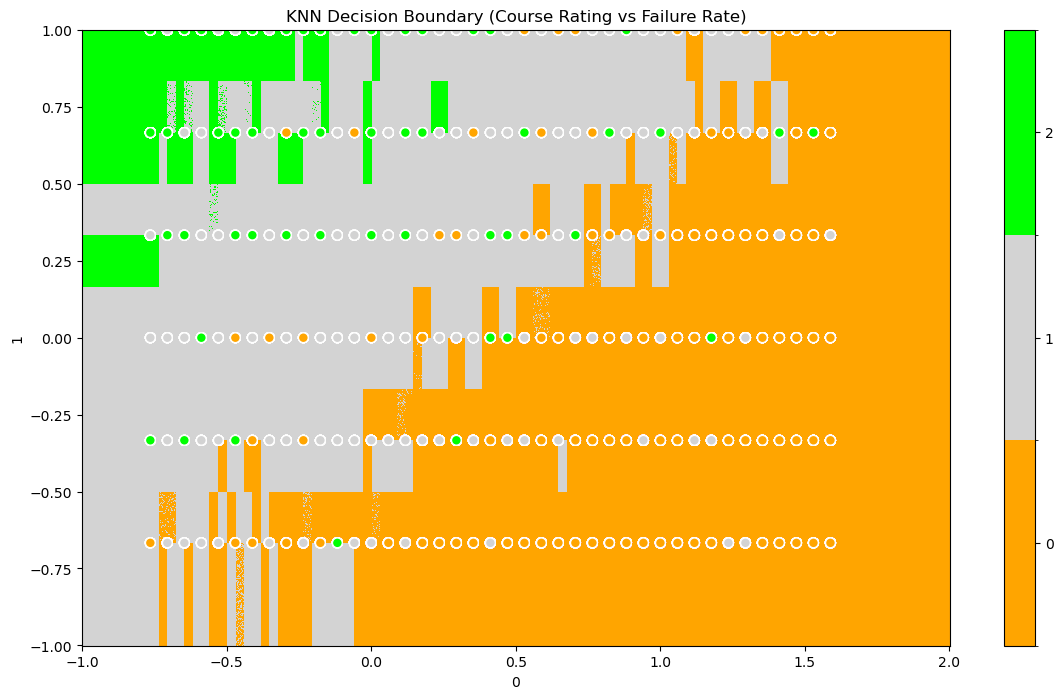

In [120]:
knn_2d = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 30, weights= 'distance')
knn_2d.fit(X_2d, y_2d)

plot_decision_regions(X_2d, y_2d, estimator=knn_2d,
                      x1=0, x2=1,
                      title="KNN Decision Boundary (Course Rating vs Failure Rate)",
                      my_cmap=cmap_clear)


X_sub = X_train[:, [0, 1]]
dt_2f = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 30, weights= 'distance').fit(X_sub, y_train)

# Plot the decision regions
plot_decision_regions(X_sub, y_train, estimator=dt_2f, x1=0, x2=1,
                      title='Decision Tree on Features course rating and assignments per week', my_cmap=cmap_clear)

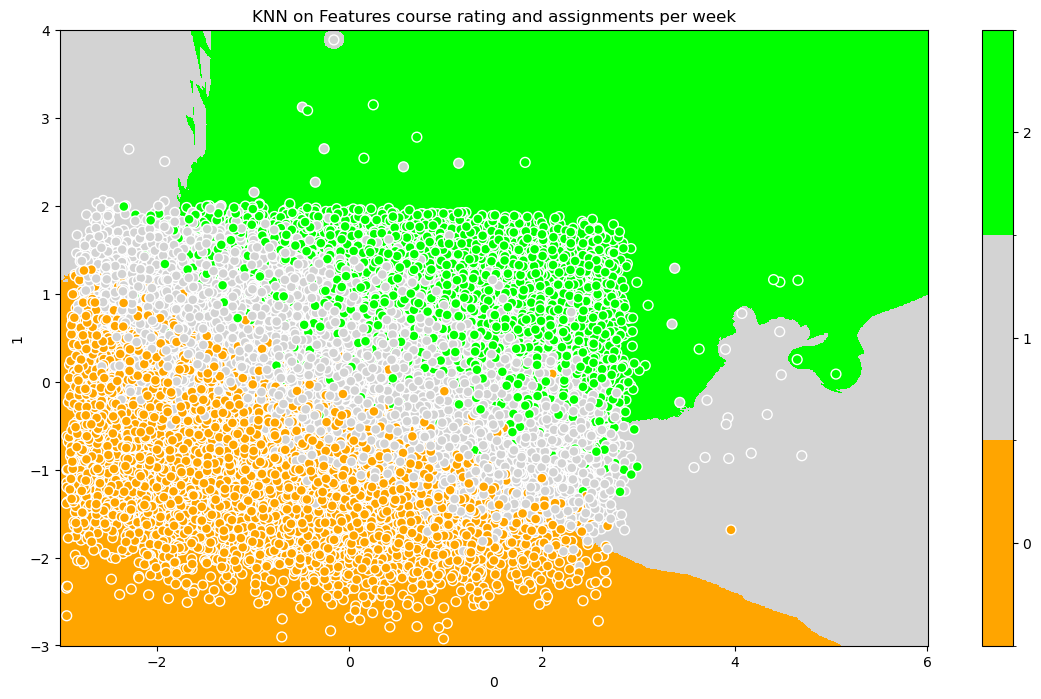

In [125]:
X_sub = X_train[:, [0, 1]]
dt_2f = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 30, weights= 'distance').fit(X_sub, y_train)

# Plot the decision regions
plot_decision_regions(X_sub, y_train, estimator=dt_2f, x1=0, x2=1,
                      title='KNN on Features course rating and assignments per week', my_cmap=cmap_clear)

# Iteration 2: Decision Trees

Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 10}
Grid Search Results:


param_max_depth  param_min_samples_split param_criterion  mean_test_score  \
0                3                        2            gini         0.706799   
1                3                        5            gini         0.706799   
2                3                       10            gini         0.706799   
3                5                        2            gini         0.789034   
4                5                        5            gini         0.789034   
5                5                       10            gini         0.789034   
6                8                        2            gini         0.842425   
7                8                        5            gini         0.842501   
8                8                       10            gini         0.842552   
9             None                        2            gini         0.836718   
10            None                        5            gini         0.838435   
11            None                       10            gini         0.839748   
12               3                        2         entropy         0.728141   
13               3                        5         entropy         0.728141   
14               3                       10         entropy         0.728141   
15               5                        2         entropy         0.787468   
16               5                        5         entropy         0.787468   
17               5                       10         entropy         0.787468   
18               8                        2         entropy         0.846694   
19               8                        5         entropy         0.846719   
20               8                       10         entropy         0.846820   
21            None                        2         entropy         0.846745   
22            None                        5         entropy         0.846467   
23            None                       10         entropy         0.846593   

    std_test_score  
0         0.004928  
1         0.004928  
2         0.004928  
3         0.003567  
4         0.003567  
5         0.003567  
6         0.006084  
7         0.006294  
8         0.006249  
9         0.003620  
10        0.004559  
11        0.003765  
12        0.003564  
13        0.003564  
14        0.003564  
15        0.003577  
16        0.003577  
17        0.003577  
18        0.003139  
19        0.003248  
20        0.003280  
21        0.004539  
22        0.004127  
23        0.005662


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2972
           1       0.83      0.88      0.85      4946
           2       0.87      0.80      0.83      1981

    accuracy                           0.85      9899
   macro avg       0.86      0.84      0.85      9899
weighted avg       0.85      0.85      0.85      9899



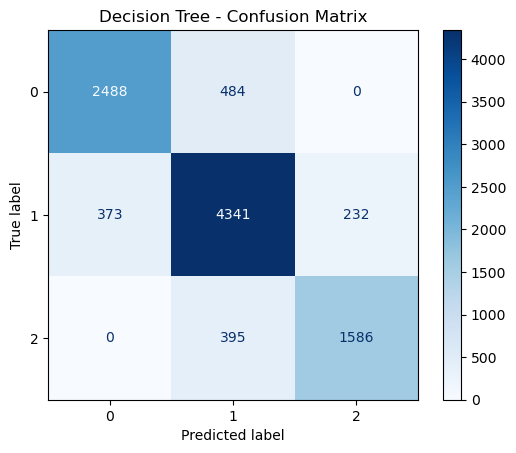

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Parameters to test
param_grid = {
    'max_depth': [3, 5, 8, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

tree_clf = DecisionTreeClassifier(random_state=42)
grid_tree = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_tree.fit(X_train, y_train)

# Best model
best_tree = grid_tree.best_estimator_
print("Best Decision Tree parameters:", grid_tree.best_params_)

results_df = pd.DataFrame(grid_tree.cv_results_)
print("Grid Search Results:")
display(results_df[['param_max_depth', 'param_min_samples_split', 'param_criterion', 'mean_test_score', 'std_test_score']])


# Evaluate on test set
y_pred_tree = best_tree.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_tree, X_test, y_test, display_labels=le.classes_, cmap='Blues')
plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [163]:
cv_score = cross_val_score(best_tree, X, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")

Cross-validated Accuracy: 0.8091 ± 0.0040


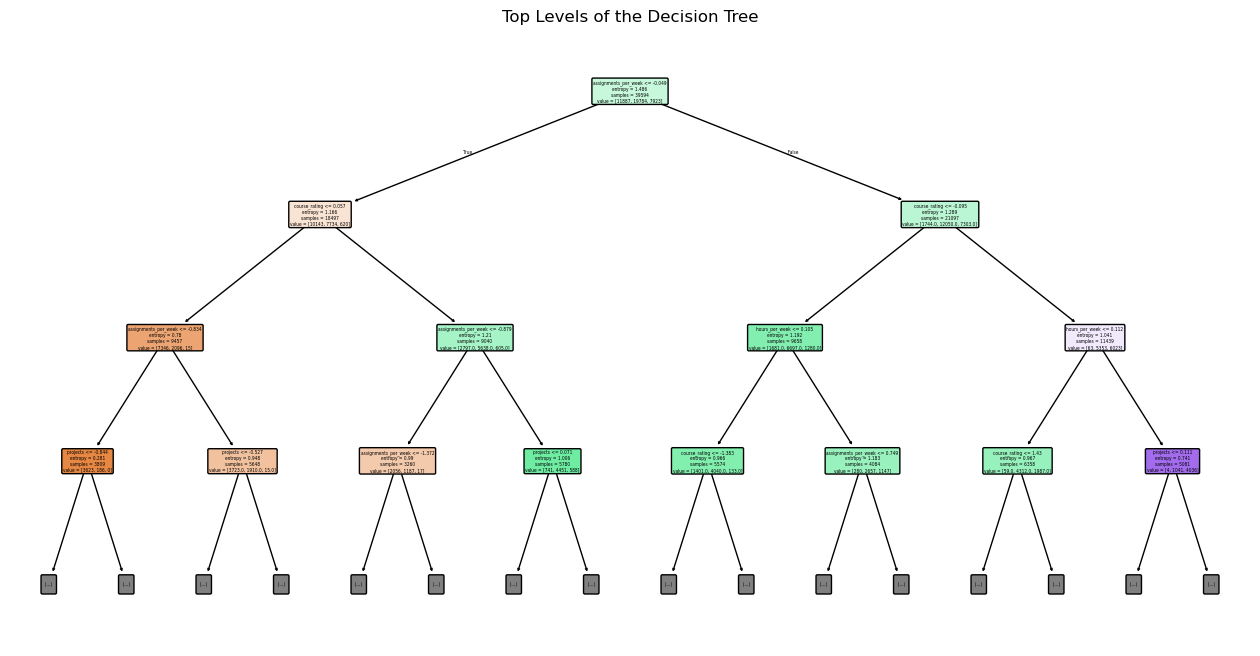

In [20]:
plt.figure(figsize=(16, 8))
plot_tree(best_tree, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.title("Top Levels of the Decision Tree")
plt.show()

In [21]:
#Create a custom color map
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'blue'])
cmap_clear = ListedColormap(['orange', 'lightgray', 'lime'])
cmap_two_clear = ListedColormap(['orange', 'lime'])

# to plot a colorbar, kinda convoluted here!
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_decision_regions(X, Y, estimator, x1=0, x2=1, title='',
                          my_cmap=cmap_clear, size=(14,8), data=True, clf=True):
    '''
    X: Array of (all) feature data 
    Y: Array of labels
    estimator: classifier (e.g., DT) or regressor trained on the feature pair (x1, x2)
    x1, x2: integers, index of the two features selected for plotting the decision region
    title: title of the plot (e.g., it might include the accuracy of the classifier)
    my_cmap: the colormap used to display label colors
    size: size of the figure, in matplotlib
    data: if True, the traiuning datapoints are shown together with the decision regions
    clf: if True, estimator is a classifier, a regressor otherwise
    '''
    
    # get feature ranges for creating a meshgrid
    feature_ranges = np.array([ (np.floor(np.min(X[:, i])), 
                                 np.ceil(np.max(X[:, i]))) 
                                 for i in [x1, x2]]  )

    num_of_pts = 1000
    
    # a meshgrid of values for (f1, f2), these are the points where 
    # algorithm will be queried and that we want to visualize
    xx, yy = np.meshgrid( np.linspace(feature_ranges[0, 0],
                                      feature_ranges[0, 1], 
                                      num=num_of_pts),
                          np.linspace(feature_ranges[1, 0],
                                      feature_ranges[1, 1], 
                                      num=num_of_pts))
    #print(xx.shape, yy.shape)

    # get the labels of all the points in the meshgrid
    labels_mesh = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # reshape the array to be of the same dimesion as xx and yy
    labels_mesh = labels_mesh.reshape(xx.shape)

    #print(np.c_[xx.ravel(), yy.ravel()].shape, labels_mesh.shape)

    plt.figure(figsize=size)
    plt.title(title)

    # the color map automatically assigns a different color to the 
    # different values of labels / cluster 
    plt.pcolormesh(xx, yy, labels_mesh, cmap=my_cmap)

    # Add the original data points 
    if data == True:
        scatter = plt.scatter(X[:, x1], X[:, x2], c=Y, s=50, edgecolor='white', cmap=my_cmap)
        #plt.colorbar(scatter)

    # plot a colorbar, kinda convoluted here!
    # Get current axis
    ax = plt.gca()

    # check if classification or regression
    if clf == True:
        # Create a colorbar with labels
        labels = np.unique(Y.values if hasattr(Y, "values") else Y)
        n_classes = len(labels)

        norm = BoundaryNorm(boundaries=np.arange(n_classes+1)-0.5, ncolors=n_classes)

        # Create a ScalarMappable for the colorbar
        sm = ScalarMappable(cmap=my_cmap, norm=norm)
        sm.set_array([])  # Required for some versions

        # Add the colorbar
        cbar = plt.colorbar(sm, ax=ax, ticks=np.arange(n_classes))
        cbar.set_ticklabels(labels)
    else:
        # Regression: use a continuous colormap (!!) and automatic scaling
        sm = plt.cm.ScalarMappable(cmap=my_cmap)
        sm.set_array(Y.values if hasattr(Y, "values") else Y)

        # Attach the colorbar to current axis
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label("Predicted value")  # Optional
        
    plt.xlabel(str(x1))
    plt.ylabel(str(x2))
        
    plt.show()

In [22]:
df

course_rating  assignments_per_week  attendance_required  \
0           1.117647             -0.666667                 -1.0   
1          -0.058824             -0.333333                  0.0   
2           0.176471              0.333333                  0.0   
3          -0.470588              0.000000                 -1.0   
4          -0.235294              1.000000                  0.0   
...              ...                   ...                  ...   
49488      -0.176471             -0.333333                 -1.0   
49489       0.411765             -0.666667                  0.0   
49490       1.588235              0.333333                  0.0   
49491      -0.764706             -0.333333                  0.0   
49492       0.411765              0.000000                  0.0   

       sentiment_score  units  hours_per_week  projects  midterms_count  \
0             1.287129   -0.5            -1.0      -1.0             0.0   
1            -0.405941    0.0            -0.6       0.0             0.0   
2             0.039604    0.0            -0.4      -1.0            -0.5   
3            -0.584158    0.0             0.0      -1.0             0.5   
4             0.722772    0.5             1.0       0.0             0.5   
...                ...    ...             ...       ...             ...   
49488         0.000000   -1.0            -0.8      -1.0            -0.5   
49489         0.495050   -0.5             2.2       0.0             0.0   
49490        -0.693069    0.5             1.2       0.0             0.5   
49491        -0.198020   -0.5            -0.2      -1.0             0.0   
49492         0.297030   -1.0             2.2       0.0             0.0   

       final_exam  grading_strictness  failure_rate  difficulty_level_num  \
0             0.0               -0.65     -1.076923                     0   
1            -1.0                0.60      0.230769                     1   
2            -1.0               -0.20     -0.384615                     0   
3            -1.0               -0.90     -0.923077                     1   
4             0.0               -0.75      0.076923                     1   
...           ...                 ...           ...                   ...   
49488         0.0                1.00      0.307692                     1   
49489         0.0                0.00     -1.230769                     1   
49490         0.0                0.25     -1.615385                     1   
49491         0.0                0.50     -0.461538                     2   
49492         0.0                0.00     -0.461538                     2   

       subject_area_Humanities  subject_area_STEM  \
0                        False              False   
1                        False              False   
2                         True              False   
3                        False               True   
4                        False              False   
...                        ...                ...   
49488                     True              False   
49489                    False               True   
49490                    False               True   
49491                    False               True   
49492                    False              False   

       subject_area_Social Science  effort_score  
0                             True     -1.038200  
1                             True     -0.192762  
2                            False     -1.246664  
3                            False     -0.111693  
4                             True      2.057034  
...                            ...           ...  
49488                        False     -1.686755  
49489                        False      1.498114  
49490                        False      2.057034  
49491                        False     -0.505458  
49492                         True      1.382300  

[49493 rows x 16 columns]

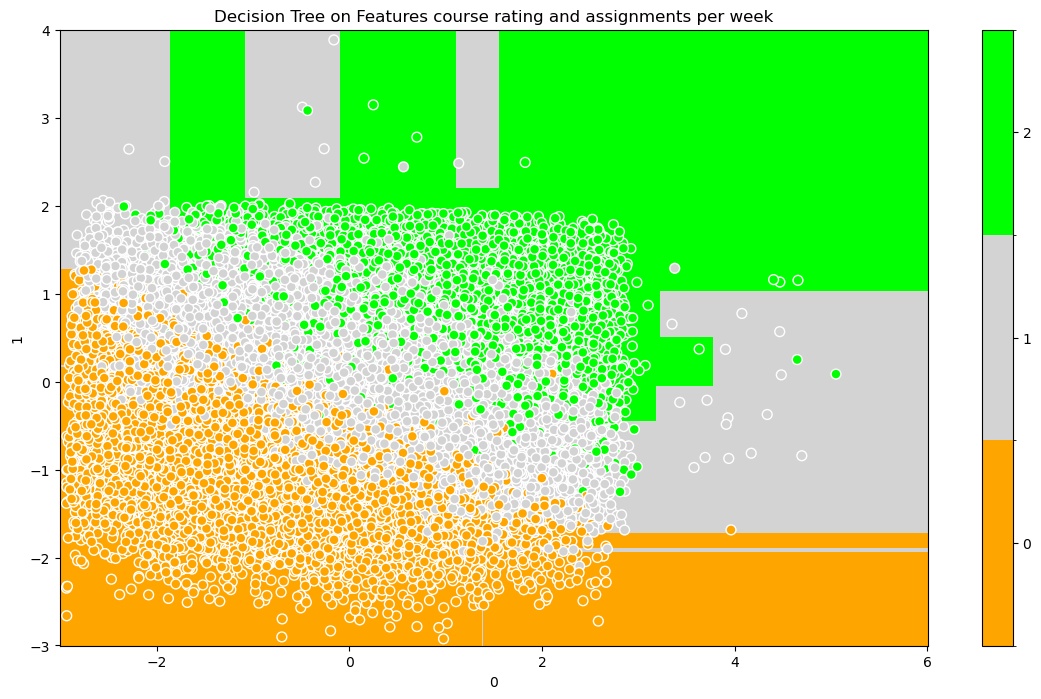

In [123]:
X_sub = X_train[:, [0, 1]]
dt_2f = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_samples_split=10).fit(X_sub, y_train)

# Plot the decision regions
plot_decision_regions(X_sub, y_train, estimator=dt_2f, x1=0, x2=1,
                      title='Decision Tree on Features course rating and assignments per week', my_cmap=cmap_clear)

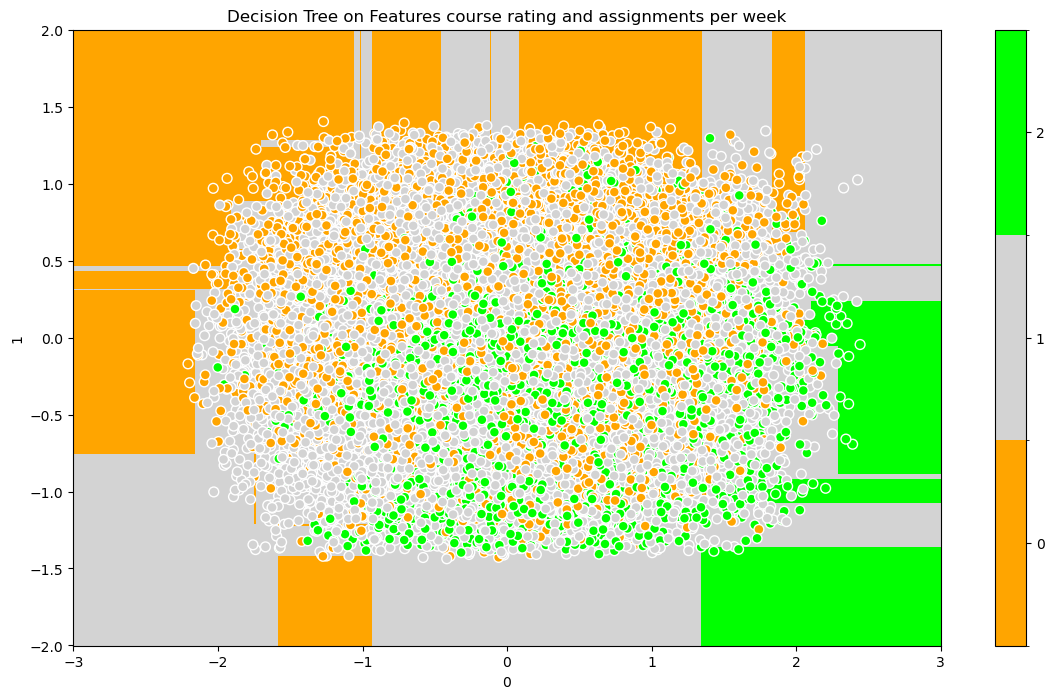

In [129]:
X_sub = X_train[:, [2, 6]]
dt_2f = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_samples_split=10).fit(X_sub, y_train)

# Plot the decision regions
plot_decision_regions(X_sub, y_train, estimator=dt_2f, x1=0, x2=1,
                      title='Decision Tree on Features course rating and assignments per week', my_cmap=cmap_clear)

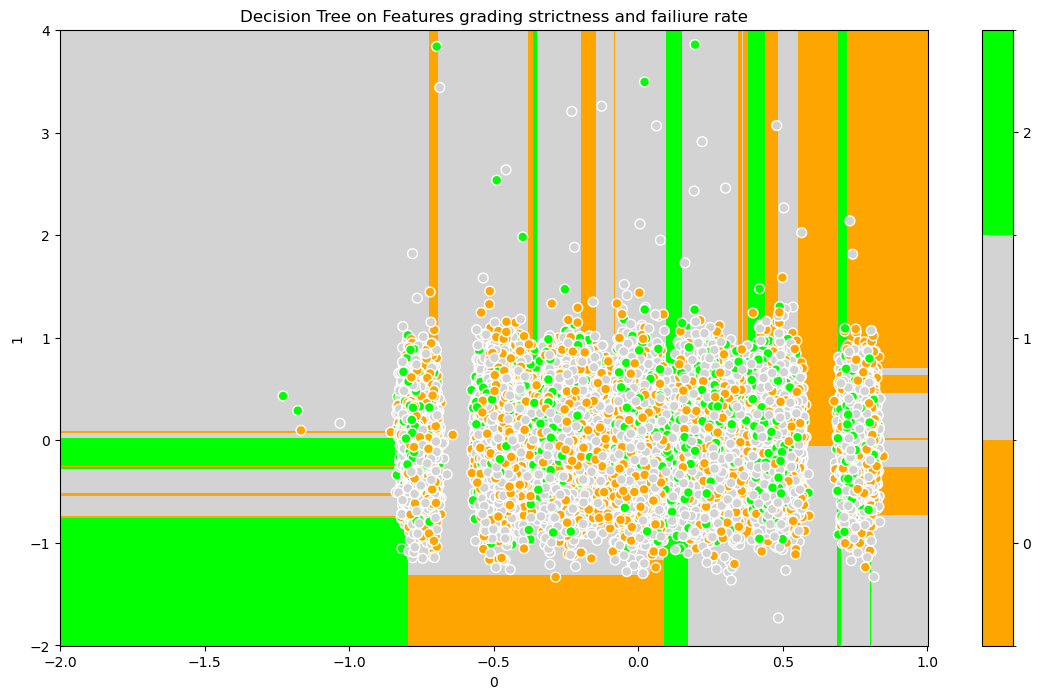

In [132]:
X_sub = X_train[:, [9, 10]]
dt_2f = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, min_samples_split=10).fit(X_sub, y_train)

# Plot the decision regions
plot_decision_regions(X_sub, y_train, estimator=dt_2f, x1=0, x2=1,
                      title='Decision Tree on Features grading strictness and failiure rate', my_cmap=cmap_clear)

# Training bagging

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Define Bagging parameter grid
param_grid_bagging = {
    'n_estimators': [10, 30, 50],         # Number of estimators
    'max_samples': [0.2, 0.5, 0.8, 1.0],  # Fraction of training samples per estimator
    'max_features': [0.5, 0.8, 1.0],      # Fraction of features per estimator
    'bootstrap': [True, False]             # With or without replacement
}

# Initialize Bagging Classifier
bagging = BaggingClassifier(
    estimator=base_estimator,
    n_jobs=-1,
    random_state=42
)

# Setup Grid Search
grid_search_bagging = GridSearchCV(
    estimator=bagging,
    param_grid=param_grid_bagging,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit
grid_search_bagging.fit(X_train, y_train)


# Best Bagging model
best_bagging = grid_search_bagging.best_estimator_
print("Best Bagging Parameters:", grid_search_bagging.best_params_)

# Predict
y_pred_bagging = best_bagging.predict(X_test)

# Evaluation
print("\nClassification Report for Best Bagging Model:\n")
print(classification_report(y_test, y_pred_bagging))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Bagging Parameters: {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}

Classification Report for Best Bagging Model:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2972
           1       0.89      0.91      0.90      4946
           2       0.91      0.87      0.89      1981

    accuracy                           0.90      9899
   macro avg       0.90      0.89      0.90      9899
weighted avg       0.90      0.90      0.90      9899



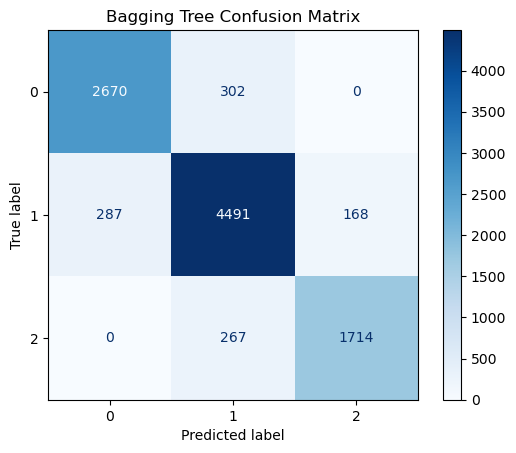

In [26]:
ConfusionMatrixDisplay.from_estimator(best_bagging, X_test, y_test, cmap='Blues')
plt.title("Bagging Tree Confusion Matrix")
plt.show()

In [165]:
cv_score = cross_val_score(best_bagging, X, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")

Cross-validated Accuracy: 0.8921 ± 0.0026


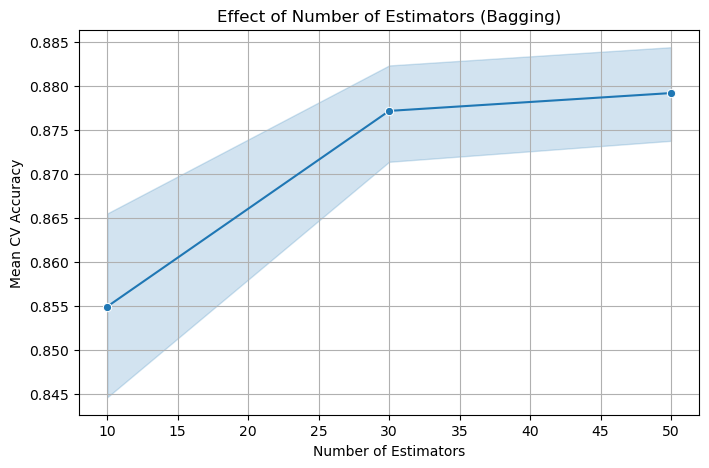

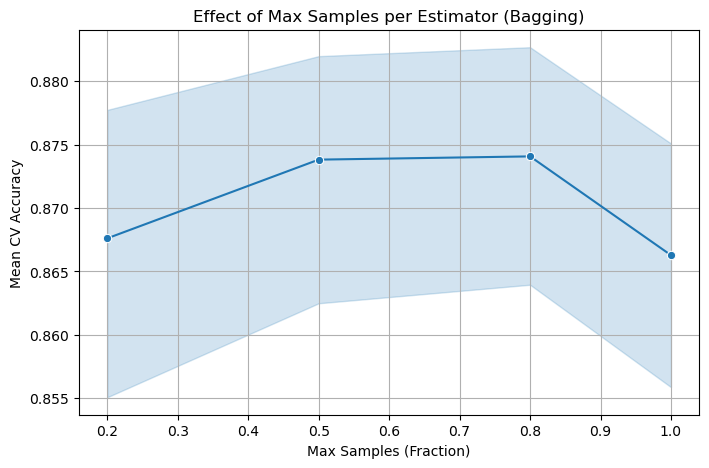

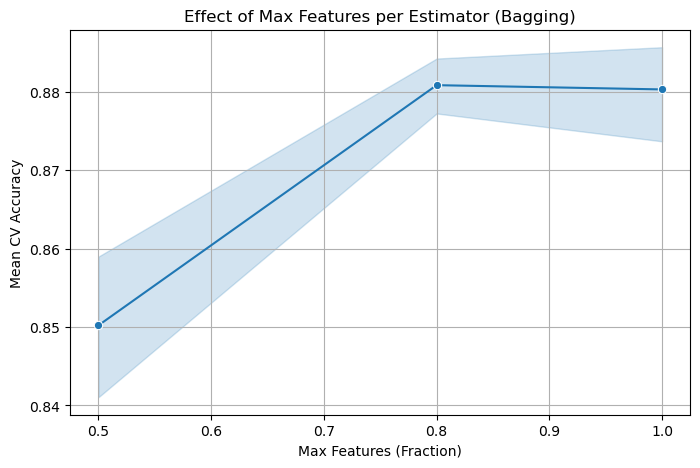

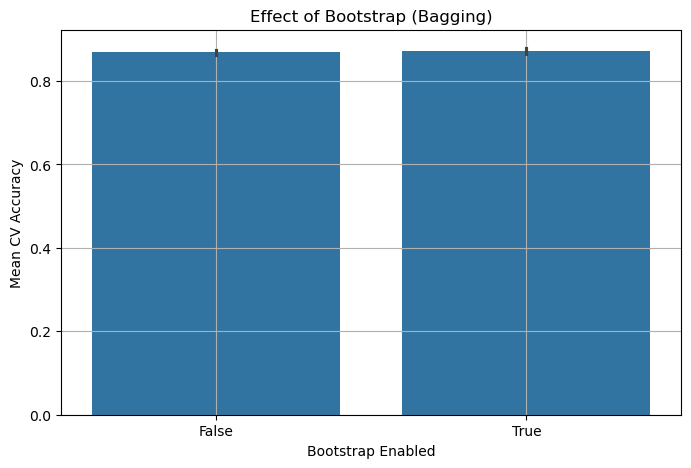

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have
results_bagging = pd.DataFrame(grid_search_bagging.cv_results_)

# 1. Plot n_estimators vs accuracy
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_bagging, x='param_n_estimators', y='mean_test_score', marker='o')
plt.title("Effect of Number of Estimators (Bagging)")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

# 2. Plot max_samples vs accuracy
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_bagging, x='param_max_samples', y='mean_test_score', marker='o')
plt.title("Effect of Max Samples per Estimator (Bagging)")
plt.xlabel("Max Samples (Fraction)")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

# 3. Plot max_features vs accuracy
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_bagging, x='param_max_features', y='mean_test_score', marker='o')
plt.title("Effect of Max Features per Estimator (Bagging)")
plt.xlabel("Max Features (Fraction)")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

# 4. Plot bootstrap vs accuracy
plt.figure(figsize=(8, 5))
sns.barplot(data=results_bagging, x='param_bootstrap', y='mean_test_score')
plt.title("Effect of Bootstrap (Bagging)")
plt.xlabel("Bootstrap Enabled")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

In [59]:
X_sub = X_train[:, [0, 1]]
dt_2f = BaggingClassifier().fit(X_sub, y_train)

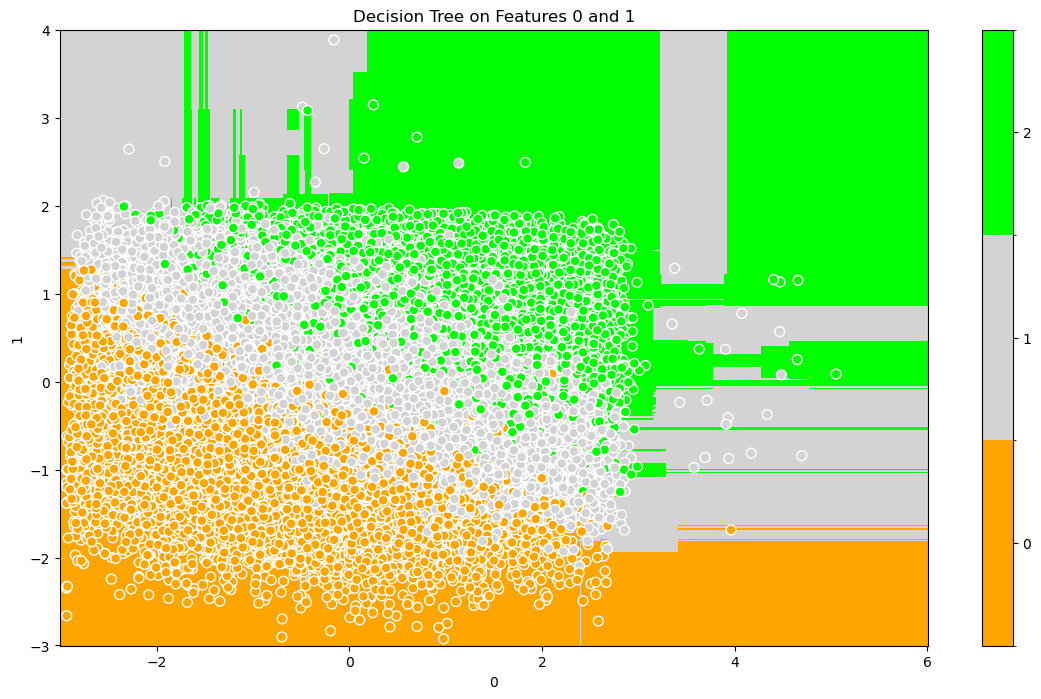

In [60]:
# Plot the decision regions
plot_decision_regions(X_sub, y_train, estimator=dt_2f, x1=0, x2=1,
                      title='Decision Tree on Features 0 and 1', my_cmap=cmap_clear)

# Training random forest

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [5, 10, 20, 30, 40],        # Depth of each tree
    'max_features': ['sqrt', 'log2'],      # Features considered per split
    'bootstrap': [True, False],            # Bagging with or without replacement
    'criterion': ['gini', 'entropy']       # Split criteria
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Setup Grid Search
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit the model
grid_search_rf.fit(X_train, y_train)


# Best model
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Predict
y_pred_rf = best_rf.predict(X_test)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Random Forest Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}


In [87]:
# Evaluation
print("\nClassification Report for Best RF Model:\n")
print(classification_report(y_test, y_pred_rf))


Classification Report for Best RF Model:

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      2972
           1       0.88      0.92      0.90      4946
           2       0.92      0.86      0.89      1981

    accuracy                           0.90      9899
   macro avg       0.91      0.89      0.90      9899
weighted avg       0.90      0.90      0.90      9899



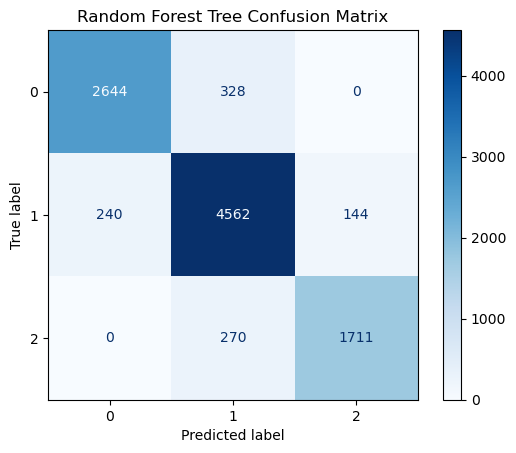

In [88]:
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Blues')
plt.title("Random Forest Tree Confusion Matrix")
plt.show()

In [167]:
cv_score = cross_val_score(best_rf, X, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")

Cross-validated Accuracy: 0.8976 ± 0.0030


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have
# results_rf = pd.DataFrame(grid_search_rf.cv_results_)

results_rf = pd.DataFrame(grid_search_rf.cv_results_)

# 1. Plot n_estimators vs accuracy
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_rf, x='param_n_estimators', y='mean_test_score', marker='o')
plt.title("Effect of Number of Estimators (Random Forest)")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

# 2. Plot max_depth vs accuracy
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_rf, x='param_max_depth', y='mean_test_score', marker='o')
plt.title("Effect of Max Depth (Random Forest)")
plt.xlabel("Max Depth")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

# 3. Plot max_features vs accuracy
plt.figure(figsize=(8, 5))
sns.barplot(data=results_rf, x='param_max_features', y='mean_test_score')
plt.title("Effect of Max Features (Random Forest)")
plt.xlabel("Max Features Selection")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

# 4. Plot bootstrap vs accuracy
plt.figure(figsize=(8, 5))
sns.barplot(data=results_rf, x='param_bootstrap', y='mean_test_score')
plt.title("Effect of Bootstrap (Random Forest)")
plt.xlabel("Bootstrap Sampling")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

# 5. Plot criterion vs accuracy
plt.figure(figsize=(8, 5))
sns.barplot(data=results_rf, x='param_criterion', y='mean_test_score')
plt.title("Effect of Criterion (Random Forest)")
plt.xlabel("Splitting Criterion")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()



In [102]:
X_sub = X_train[:, [0, 1]]
dt_2f = RandomForestClassifier().fit(X_sub, y_train)

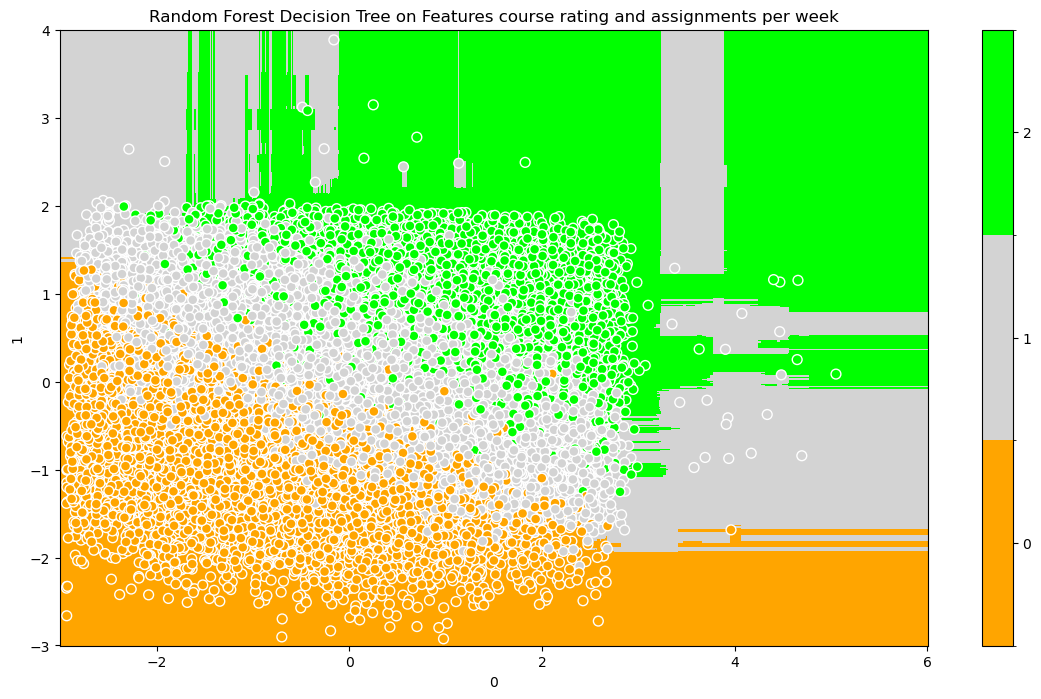

In [103]:
# Plot the decision regions
plot_decision_regions(X_sub, y_train, estimator=dt_2f, x1=0, x2=1,
                      title='Random Forest Decision Tree on Features course rating and assignments per week', my_cmap=cmap_clear)

# Iteration 3: Support Vector Machines (SVMs)


In this iteration, we move towards **margin-based learning methods** by experimenting with **Support Vector Machines (SVMs)**. SVMs are powerful classifiers that find the optimal decision boundary by maximizing the margin between classes.


We explore three variations:
- **Linear SVM**: Tests if the data is linearly separable.
- **RBF (Gaussian Kernel) SVM**: Allows flexible, curved boundaries for nonlinear separability.
- **Polynomial Kernel SVM**: Captures more complex, higher-order interactions.

Each kernel increases model complexity progressively. This strategy allows us to systematically understand how model flexibility affects performance after simpler models (KNN, Decision Tree).

We apply cross-validation to tune hyperparameters and evaluate using classification reports and confusion matrices.


## Linear SVM

In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Linear SVM Grid
param_grid_linear = {
    'C': [0.1, 10],
    'kernel': ['linear'],
    'tol' : [1e-3]
}

svm_linear = SVC()
grid_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_linear.fit(X_train, y_train)

best_linear = grid_linear.best_estimator_
print("Best Linear SVM Parameters:", grid_linear.best_params_)

# Evaluate
y_pred_linear = best_linear.predict(X_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Linear SVM Parameters: {'C': 0.1, 'kernel': 'linear', 'tol': 0.001}



Linear SVM Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2972
           1       0.90      0.91      0.91      4946
           2       0.91      0.89      0.90      1981

    accuracy                           0.91      9899
   macro avg       0.91      0.90      0.91      9899
weighted avg       0.91      0.91      0.91      9899



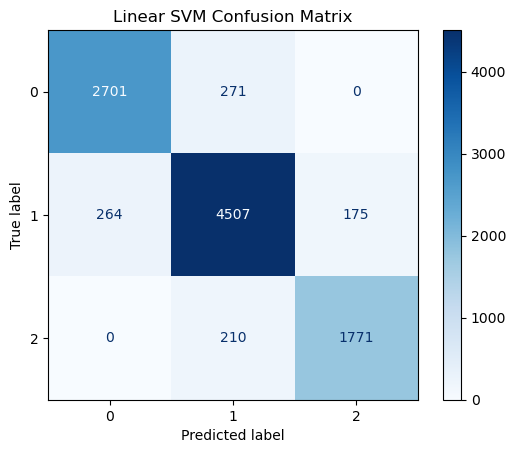

In [93]:
print("\nLinear SVM Classification Report:\n")
print(classification_report(y_test, y_pred_linear))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_linear, X_test, y_test, cmap='Blues')
plt.title("Linear SVM Confusion Matrix")
plt.show()

In [168]:
cv_score = cross_val_score(best_linear, X, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")

Cross-validated Accuracy: 0.9058 ± 0.0010


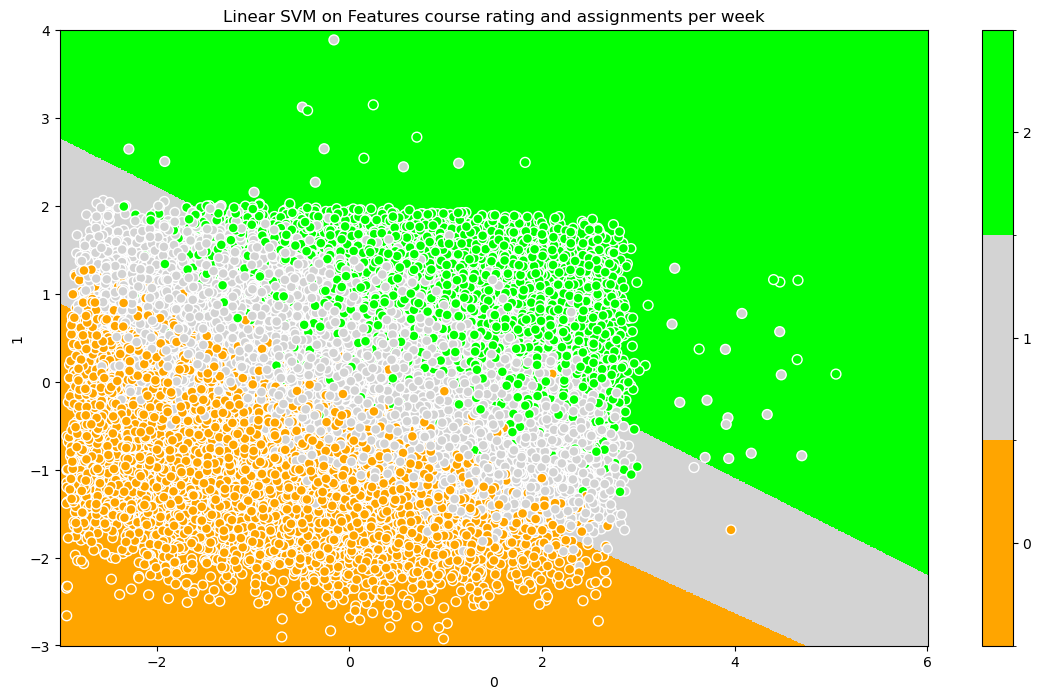

In [116]:
X_sub = X_train[:, [0, 1]]
dt_2f = SVC(C= 0.1, kernel='linear', tol= 0.001).fit(X_sub, y_train)

# Plot the decision regions
plot_decision_regions(X_sub, y_train, estimator=dt_2f, x1=0, x2=1,
                      title='Linear SVM on Features course rating and assignments per week', my_cmap=cmap_clear)

## RBF SVM

In [94]:
# RBF SVM Grid
param_grid_rbf = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'tol' : [1e-3]
}

svm_rbf = SVC()
grid_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rbf.fit(X_train, y_train)

best_rbf = grid_rbf.best_estimator_
print("Best RBF SVM Parameters:", grid_rbf.best_params_)

# Evaluate
y_pred_rbf = best_rbf.predict(X_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best RBF SVM Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf', 'tol': 0.001}



RBF SVM Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2972
           1       0.91      0.92      0.91      4946
           2       0.92      0.91      0.91      1981

    accuracy                           0.91      9899
   macro avg       0.91      0.91      0.91      9899
weighted avg       0.91      0.91      0.91      9899



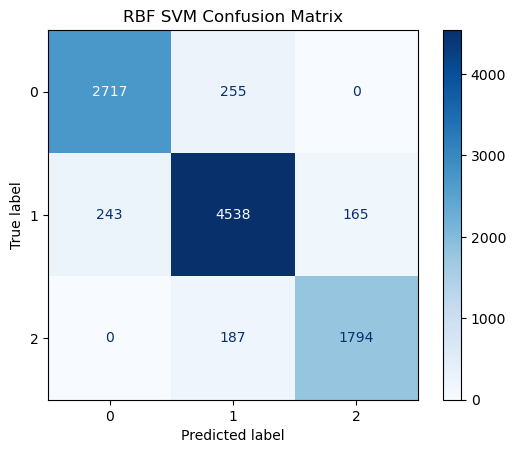

In [95]:
print("\nRBF SVM Classification Report:\n")
print(classification_report(y_test, y_pred_rbf))

ConfusionMatrixDisplay.from_estimator(best_rbf, X_test, y_test, cmap='Blues')
plt.title("RBF SVM Confusion Matrix")
plt.show()

In [169]:
cv_score = cross_val_score(best_rbf, X, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")

Cross-validated Accuracy: 0.9156 ± 0.0025


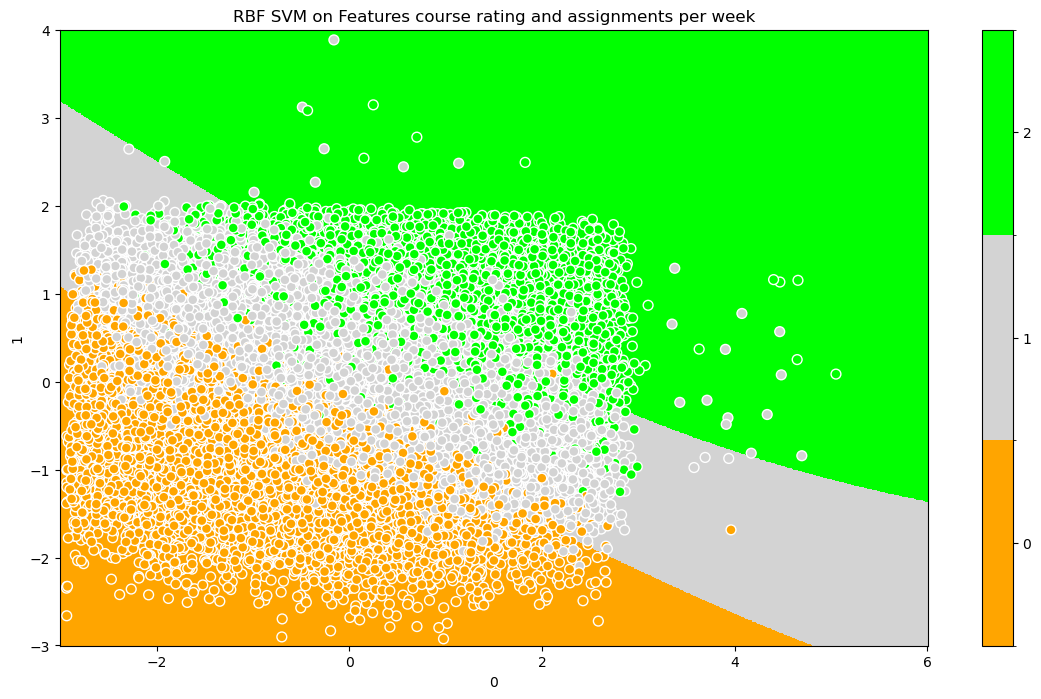

In [114]:
X_sub = X_train[:, [0, 1]]
dt_2f = SVC(C=100, gamma=0.01, kernel='rbf', tol=0.001).fit(X_sub, y_train)

# Plot the decision regions
plot_decision_regions(X_sub, y_train, estimator=dt_2f, x1=0, x2=1,
                      title='RBF SVM on Features course rating and assignments per week', my_cmap=cmap_clear)

## SVM Poly

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Polynomial SVM Parameters: {'C': 0.1, 'coef0': 1, 'degree': 3, 'kernel': 'poly', 'tol': 0.001}

Polynomial SVM Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2972
           1       0.91      0.92      0.91      4946
           2       0.92      0.90      0.91      1981

    accuracy                           0.91      9899
   macro avg       0.92      0.91      0.91      9899
weighted avg       0.91      0.91      0.91      9899



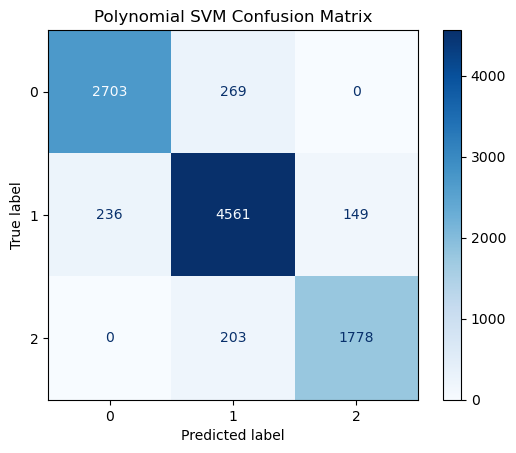

In [96]:
# Polynomial SVM Grid
param_grid_poly = {
    'C': [0.1, 10],
    'degree': [2, 3, 4],
    'coef0': [0, 1],
    'kernel': ['poly'],
    'tol' : [1e-3]
}

svm_poly = SVC()
grid_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_poly.fit(X_train, y_train)

best_poly = grid_poly.best_estimator_
print("Best Polynomial SVM Parameters:", grid_poly.best_params_)

# Evaluate
y_pred_poly = best_poly.predict(X_test)
print("\nPolynomial SVM Classification Report:\n")
print(classification_report(y_test, y_pred_poly))

ConfusionMatrixDisplay.from_estimator(best_poly, X_test, y_test, cmap='Blues')
plt.title("Polynomial SVM Confusion Matrix")
plt.show()

In [171]:
cv_score = cross_val_score(best_poly, X, y_encoded, cv=5, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")

Cross-validated Accuracy: 0.9149 ± 0.0028


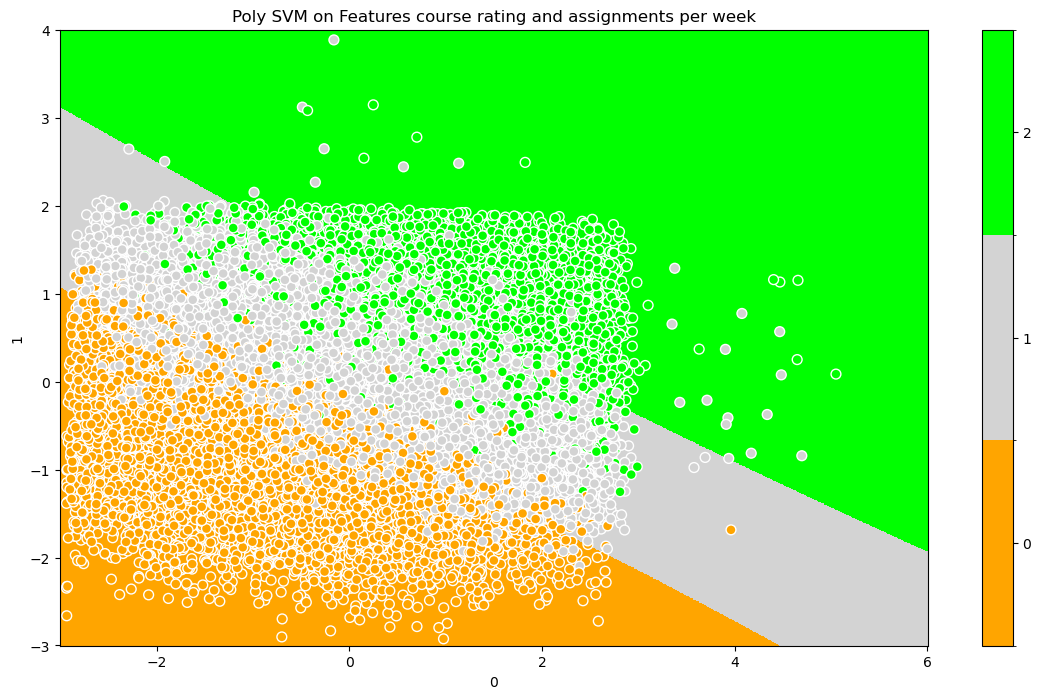

In [115]:
X_sub = X_train[:, [0, 1]]
dt_2f = SVC(C= 0.1, coef0= 1, degree= 3, kernel= 'poly', tol= 0.001).fit(X_sub, y_train)

# Plot the decision regions
plot_decision_regions(X_sub, y_train, estimator=dt_2f, x1=0, x2=1,
                      title='Poly SVM on Features course rating and assignments per week', my_cmap=cmap_clear)

In [144]:
import joblib

# Save trained best model
joblib.dump(best_rbf, 'best_model.pkl')  


['best_model.pkl']